# COVID-19 Evolution Germany
2020-03-22

## Use the Gaussian Error-Function as the model

In [1]:
# define the error function for fitting
def fit_func(x,a,b,c):
    import scipy
#    c = 80E6
#    c = 1.32E5
    fit = c*(scipy.special.erf(a*(x-b)) + 1)*0.5
    return fit

## Define the Data-Set

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib.dates import (DateFormatter, drange)
import seaborn as sns
import datetime
from scipy import interpolate
from scipy.optimize import curve_fit
from IPython.core.display import display, HTML

In [3]:
# data for Germany from Johns Hopkins University
# https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
cases_data = np.array([
    0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,\
    48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848,
    22364,24873,29056,32986, 37323,43938, 50871, 57695, 62435, 66885, 71808, 77872, 84794, 91159, 96092,
    100123, 103374, 107663, 113296, 118181, 122171, 124908, 127854, 130072, 131359, 134753, 137698, 
    141397, 143342, 145184, 147065, 148291, 150648, 153129, 154999, 156513, 157770])
death_data = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 7, 9, 11, 17, 24, 28, 44, 67, 84, 94, 123, 157, 206, 
    267, 342, 433, 533, 645, 775, 920, 1107, 1275, 1444, 1584, 1810, 2016, 2349, 2607, 2767, 2736, 3022, 
    3194, 3294, 3804, 4052, 4352, 4459, 4586, 4862, 5033, 5279, 5575, 5760, 5877, 5976])
# to Apr 05
cases_data_new = cases_data - np.roll(cases_data, 1)
cases_data_new[0] = 0
days_data = np.arange(1,len(cases_data)+1)
date_start = datetime.date(2020, 1, 22)
date_end   = date_start + datetime.timedelta(days=len(cases_data))
dates_data = drange(date_start, date_end, datetime.timedelta(days=1))

## Fit the data to the model

In [4]:
# fit the data with the cases to the error function
popt_cases_latest, pcov = curve_fit(fit_func, days_data, cases_data, p0=[0.04, 120, 1500E5])
cases_fit = fit_func(days_data, *popt_cases_latest)
cases_fit_new = cases_fit - np.roll(cases_fit, 1)
cases_fit_new[0] = 0

In [5]:
# fit the data with the deaths to the error function
popt_death_latest, pcov = curve_fit(fit_func, days_data, death_data, p0=[0.04, 120, 80E3])
death_fit = fit_func(days_data, *popt_death_latest)
death_fit_new = death_fit - np.roll(cases_fit, 1)
death_fit_new[0] = 0

In [6]:
# extrapolate to the coming months
days_ex = np.arange(1, 150)
cases_ex = fit_func(days_ex, *popt_cases_latest)
death_ex = fit_func(days_ex, *popt_death_latest)
date2 = date_start + datetime.timedelta(days=len(days_ex))
dates_ex = drange(date_start, date2, datetime.timedelta(days=1))

## Plot the Data

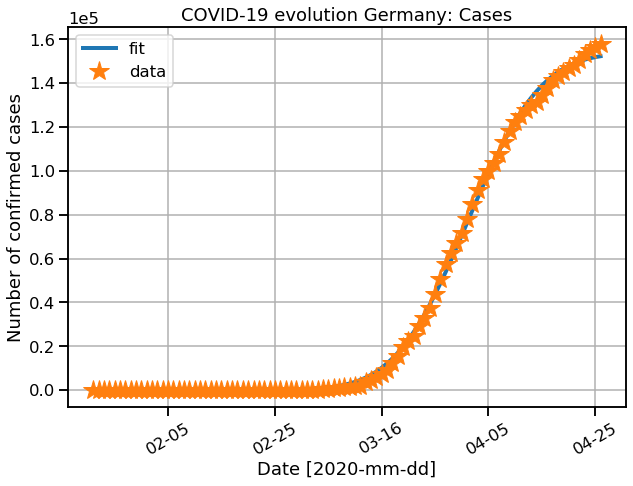

In [7]:
# plot the data of the total number of cases and the fitted function
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(dates_data, cases_fit, '-', linewidth=4, label="fit")
ax.plot(dates_data, cases_data, '*', linewidth=4, label="data", markersize=20)
ax.set_xlabel(r"Date [2020-mm-dd]")
ax.set_ylabel(r"Number of confirmed cases")
ax.set_title(r"COVID-19 evolution Germany: Cases")
ax.grid(True)
#ax.tick_params(labelsize=14)
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.legend()
plt.show()

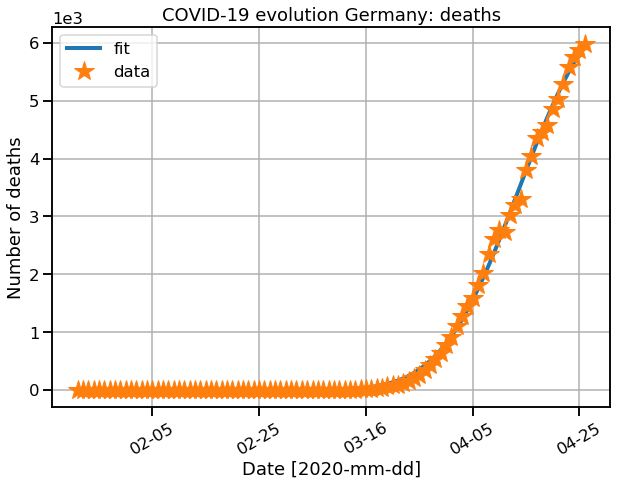

In [8]:
# plot the data of the total number of cases and the fitted function
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(dates_data, death_fit, '-', linewidth=4, label="fit")
ax.plot(dates_data, death_data, '*', linewidth=4, label="data", markersize=20)
ax.set_xlabel(r"Date [2020-mm-dd]")
ax.set_ylabel(r"Number of deaths")
ax.set_title(r"COVID-19 evolution Germany: deaths")
ax.grid(True)
#ax.tick_params(labelsize=14)
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.legend()
plt.show()

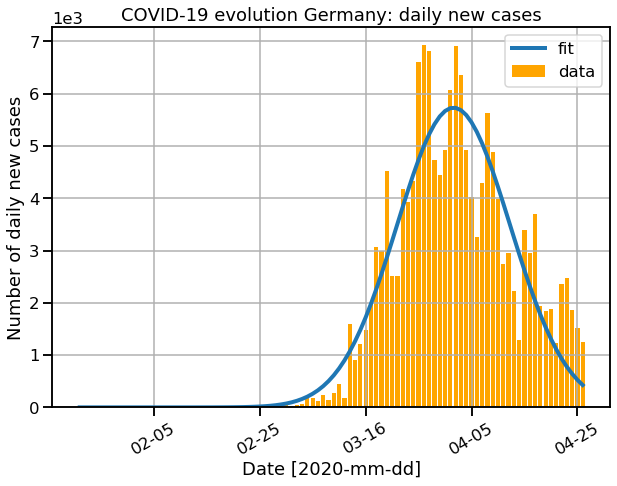

In [9]:
# plot the data of the daily new cases and the fitted function
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(dates_data, cases_fit_new, '-', linewidth=4, label="fit")
ax.bar(dates_data, cases_data_new, label="data", color='orange')
ax.set_xlabel(r"Date [2020-mm-dd]")
ax.set_ylabel(r"Number of daily new cases")
ax.set_title(r"COVID-19 evolution Germany: daily new cases")
ax.grid(True)
#ax.tick_params(labelsize=14)
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.legend()
plt.show()

## Plot the Predictions

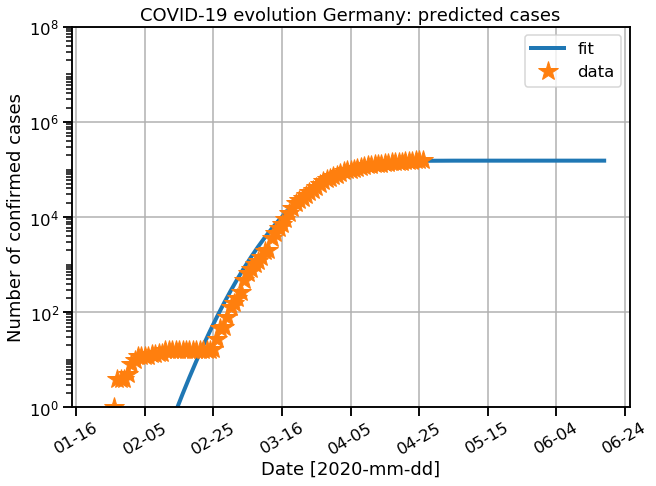

In [10]:
# plot the data with the cases and the extra-polation
fig, ax = plt.subplots(figsize=(10, 7))
ax.semilogy(dates_ex, cases_ex, '-', linewidth=4, label="fit")
ax.semilogy(dates_data, cases_data, '*', linewidth=4, label="data", markersize=20)
ax.set_xlabel(r"Date [2020-mm-dd]") # , fontsize=14)
ax.set_ylabel(r"Number of confirmed cases") # , fontsize=14)
ax.set_title(r"COVID-19 evolution Germany: predicted cases") # , fontsize=22)
ax.grid(True)
ax.set_ylim(1, 100E6)
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)# , labelsize=10)
locmin = ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.legend()
plt.show()

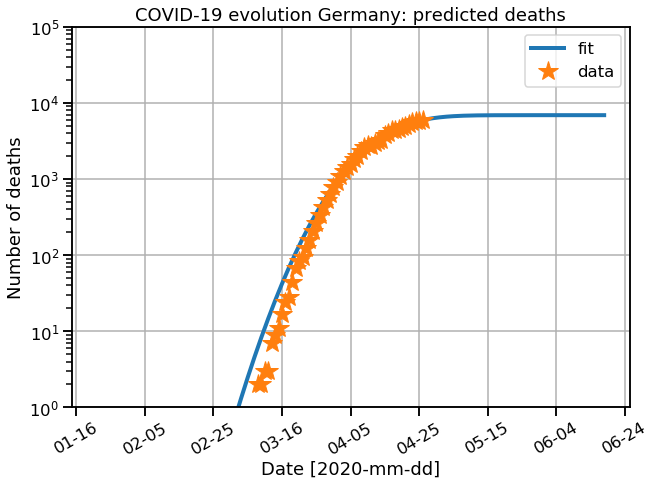

In [11]:
# plot the data with the deaths and the extra-polation
fig, ax = plt.subplots(figsize=(10, 7))
ax.semilogy(dates_ex, death_ex, '-', linewidth=4, label="fit")
ax.semilogy(dates_data, death_data, '*', linewidth=4, label="data", markersize=20)
ax.set_xlabel(r"Date [2020-mm-dd]") # , fontsize=14)
ax.set_ylabel(r"Number of deaths") # , fontsize=14)
ax.set_title(r"COVID-19 evolution Germany: predicted deaths") # , fontsize=22)
ax.grid(True)
ax.set_ylim(1, 1E5)
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)# , labelsize=10)
locmin = ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.legend()
plt.show()

## Some statistics and predictions

In [12]:
# Calculate some statistics
date_interpolate_cases = interpolate.interp1d(cases_ex, days_ex)
date_peak_cases = date_start + datetime.timedelta(days=popt_cases_latest[1])
date_interpolate_death = interpolate.interp1d(death_ex, days_ex)
date_peak_death = date_start + datetime.timedelta(days=popt_death_latest[1])
try:
    date_1M = date_start + datetime.timedelta(days=float(date_interpolate(1E6)))
except:
    date_1M = np.nan
number_tot_cases = popt_cases_latest[2]
number_tot_death = popt_death_latest[2]

In [13]:
display(HTML('<h3>Estimated day, when 1 million people are infected: {0}</h3>'.format(date_1M)))
display(HTML('<h3>Estimated day with the peak in the new infections: <span style=\"color:red;\">{0}</span></h3>'.format(date_peak_cases)))
display(HTML('<h3>Estimated day with the peak in the deaths: <span style=\"color:red;\">{0}</span></h3>'.format(date_peak_death)))
display(HTML('<h3>Estimated total number of cases: {0:.0f}</h3>'.format(number_tot_cases)))
display(HTML('<h3>Estimated total number of deaths: {0:.0f}</h3>'.format(number_tot_death)))

## Calculate the Probability to have at least one positive case in your company

In [14]:
# calculate the probability to have at least one infection in your company
people_germany = 80E6
people_company = 300
name_company = "ESO"

array_prob_company = np.array([0])
for day in np.arange(0,len(days_ex)-1):
    number_infections = cases_ex[day]
    prob_company = 1 - np.exp(-people_company*(number_infections/people_germany))
    array_prob_company = np.append(array_prob_company, prob_company)

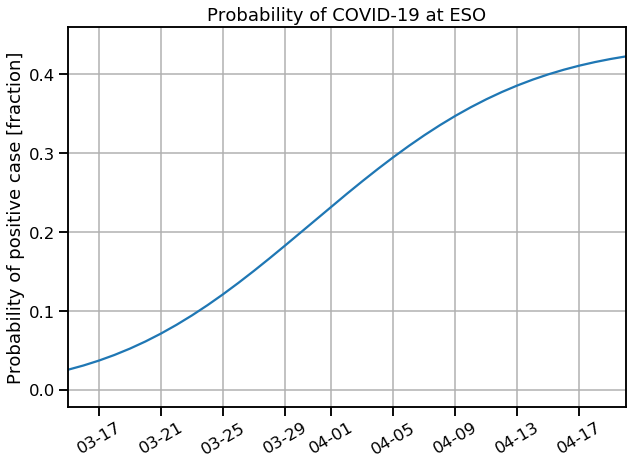

In [15]:
# plot the probability to have at least one infection in your company
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot_date(dates_ex, array_prob_company, '-')
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)# , labelsize=10)
ax.set_ylabel(r"Probability of positive case [fraction]")
ax.set_title(r"Probability of COVID-19 at {0}".format(name_company))
ax.grid(True)
ax.set_xlim(datetime.date(2020, 3, 15), datetime.date(2020, 4, 20))
#ax.tick_params(labelsize=14)
# plt.legend(fontsize=14)
plt.savefig('prob_' + name_company + '.png')
plt.show()

## Historical Evolution

In [16]:
# calculate the evolution of the estimated day of the peak infections
date_start_history = datetime.date(2020, 3, 10)
date_peak_history = np.array([])
date_1M_history = np.array([])
dates_history = drange(date_start_history, date_end, datetime.timedelta(days=1))
popt = [0.04, 120, 80E6]
for day in dates_history:
    cases_history = cases_data[dates_data<=day]
    days_history = days_data[dates_data<=day]

    # fit the data to the error function
    try:
        popt, pcov = curve_fit(fit_func, days_history, cases_history, p0=popt)
        date_peak_history = np.append(date_peak_history, date_start + datetime.timedelta(days=popt[1]))
        date_1M_history = np.append(date_1M_history, date_start + datetime.timedelta(days=(-1.5868/popt[0]+popt[1])))
    except:
        date_peak_history = np.append(date_peak_history, date_start)# + datetime.timedelta(days=popt[1]))
        date_1M_history = np.append(date_1M_history, date_start)# + datetime.timedelta(days=(-1.5868/popt[0]+popt[1])))

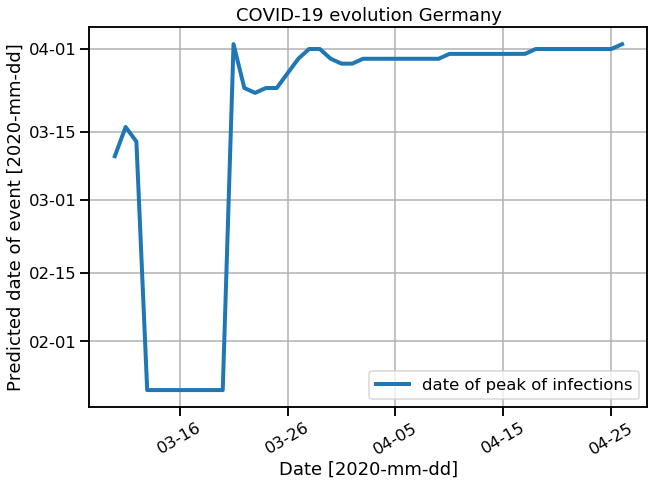

In [17]:
# plot the estimated day of the peak infections versus time
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(dates_history, date_peak_history, '-', linewidth=4, label="date of peak of infections")
#ax.plot(dates_history, date_1M_history, '-', linewidth=4, label="date of 1 million infections")
ax.set_xlabel(r"Date [2020-mm-dd]")
ax.set_ylabel(r"Predicted date of event [2020-mm-dd]")
ax.set_title(r"COVID-19 evolution Germany")
ax.grid(True)
#ax.tick_params(labelsize=14)
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.yaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)
plt.legend()
plt.show()

-1.5849506825111517


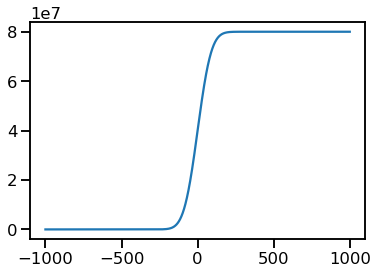

In [18]:
# calculate the argument of the fit_func for 1 million infections
p = [0.01,0, 80E6]
x = np.arange(-1000, 1001, 1)
y = fit_func(x, *p)
plt.plot(x,y)
d_i = interpolate.interp1d(y, x)
d_1M = d_i(1E6)
print(p[0]*d_1M)

## New cases per day

In [19]:
# the parameters of the Gaussian from the latest fit of the data to the error function
s = np.sqrt(1/(2*popt_cases_latest[0]**2))
x0 = popt_cases_latest[1]

# extrapolate to the coming months
days_ex = np.arange(1, 300)
#y_ex = popt_latest[0]*80E6/np.sqrt(np.pi)*np.exp(-(x_ex-x0)**2/(2*s**2))
daily_cases = popt_cases_latest[2]/(s*np.sqrt(2*np.pi))*np.exp(-(days_ex-x0)**2/(2*s**2))
date2 = date_start + datetime.timedelta(days=len(days_ex))
dates_ex = drange(date_start, date2, datetime.timedelta(days=1))

# check if the integral is 80E6
#print(np.sum(daily_cases)/popt_cases_latest[2])

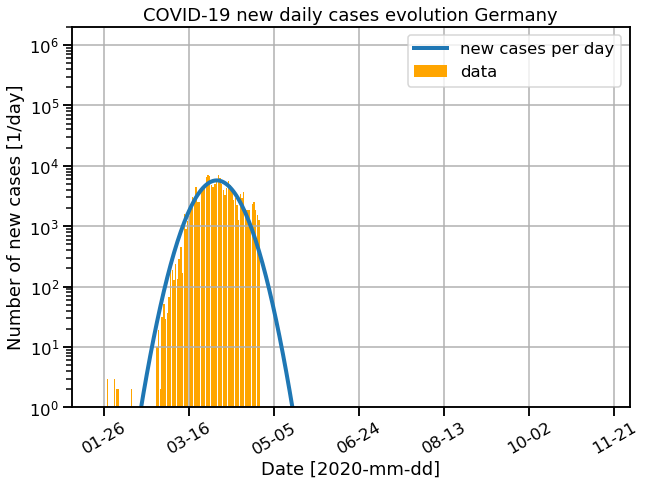

In [20]:
# plot the predicted daily cases
fig, ax = plt.subplots(figsize=(10, 7))
ax.semilogy(dates_ex, daily_cases, '-', linewidth=4, label="new cases per day", markersize=20)
ax.bar(dates_data, cases_data_new, label="data", color='orange')
ax.set_xlabel(r"Date [2020-mm-dd]") # , fontsize=14)
ax.set_ylabel(r"Number of new cases [1/day]") # , fontsize=14)
ax.set_title(r"COVID-19 new daily cases evolution Germany") # , fontsize=22)
ax.grid(True)
ax.set_ylim(1, 2E6)
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)# , labelsize=10)
locmin = ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.legend()
plt.show()

In [21]:
# convolve with a flat-top with a width of 14 days to get the total number of people infected at the same time
kernel = np.zeros(28)
kernel[0:14] = 1
contemporary_infections = np.convolve(daily_cases, kernel, 'same')

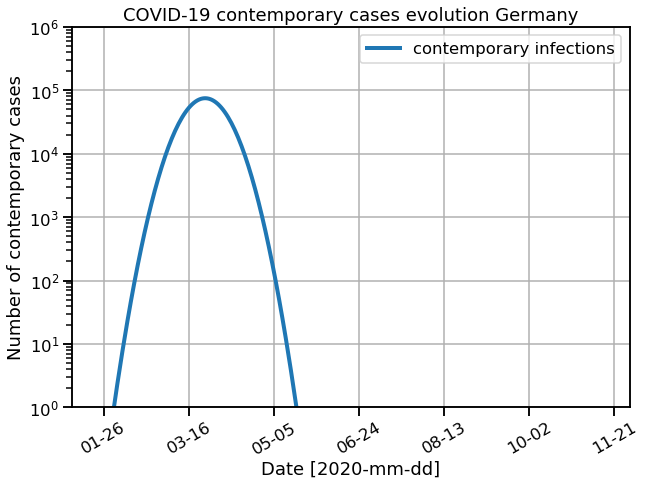

In [22]:
# plot the number of contemporary infected people
fig, ax = plt.subplots(figsize=(10, 7))
ax.semilogy(dates_ex, contemporary_infections, '-', linewidth=4, label="contemporary infections", markersize=20)
ax.set_xlabel(r"Date [2020-mm-dd]") # , fontsize=14)
ax.set_ylabel(r"Number of contemporary cases") # , fontsize=14)
ax.set_title(r"COVID-19 contemporary cases evolution Germany") # , fontsize=22)
ax.grid(True)
ax.set_ylim(1,1E6)
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)# , labelsize=10)
locmin = ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.legend()
plt.show()